<a href="https://colab.research.google.com/github/Victoria59Olmedo/-proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible values for columns
apellidos = ['Gonzalez', 'Rodriguez', 'Perez', 'Gomez', 'Lopez', 'Martinez', 'Sanchez', 'Ramirez', 'Flores', 'Torres']
nombres = ['Sofia', 'Mateo', 'Valentina', 'Santiago', 'Isabella', 'Benjamin', 'Mia', 'Thiago', 'Emma', 'Lucas']
materias = ['Matemáticas', 'Lengua y Literatura', 'Ciencias Naturales', 'Historia', 'Geografía', 'Educación Física', 'Inglés', 'Artes', 'Música', 'Informática']

# Create a DataFrame with 100 rows
num_filas = 100
data = {
    'Apellido': [random.choice(apellidos) for _ in range(num_filas)],
    'Nombre': [random.choice(nombres) for _ in range(num_filas)],
    'nro_dni': np.random.randint(10000000, 99999999, size=num_filas),
    'Materia Escolar': [random.choice(materias) for _ in range(num_filas)],
    'Nota 1er Trimestre': np.random.randint(1, 11, size=num_filas),  # Notas del 1 al 10
    'Nota 2do Trimestre': np.random.randint(1, 11, size=num_filas),
    'Nota 3er Trimestre': np.random.randint(1, 11, size=num_filas),
    'Faltas a clases': np.random.randint(0, 20, size=num_filas)  # Faltas hasta 20
}

df = pd.DataFrame(data)

# Print the DataFrame
df

,Apellido,Nombre,nro_dni,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Gonzalez,Valentina,74919974,Música,7,10,9,16
1,Flores,Santiago,57840713,Ciencias Naturales,1,1,5,7
2,Rodriguez,Mateo,45107287,Ciencias Naturales,6,1,10,0
3,Ramirez,Sofia,65708960,Matemáticas,6,3,2,17
4,Martinez,Benjamin,10725126,Matemáticas,10,6,8,2
...,...,...,...,...,...,...,...,...
95,Perez,Valentina,99863981,Informática,5,7,1,5
96,Lopez,Mateo,97053245,Lengua y Literatura,5,5,5,0
97,Gomez,Benjamin,55262426,Educación Física,3,9,4,7
98,Perez,Lucas,47611377,Música,4,1,1,13


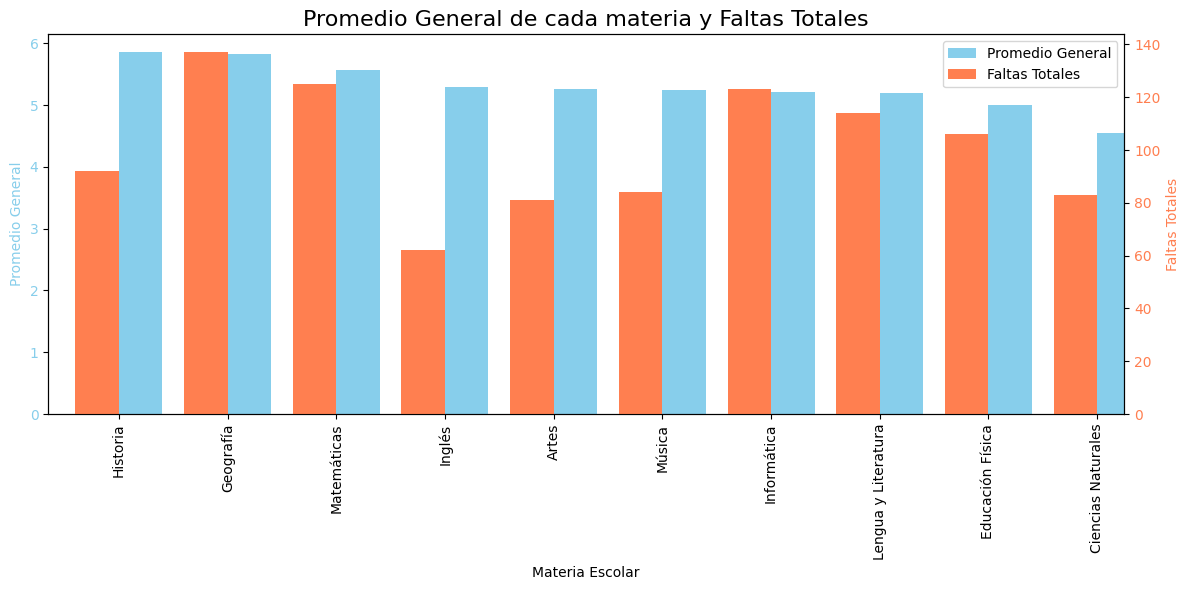

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Sort subjects by average grade in descending order
average_grades_sorted = average_grades.sort_values(ascending=False)

# Calculate total absences for each subject
total_absences = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
average_grades_sorted.plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4, label='Promedio General')

ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de cada materia y Faltas Totales', fontsize=16)

# Create a second y-axis for absences
ax2 = ax1.twinx()

# Plot total absences
total_absences.loc[average_grades_sorted.index].plot(kind='bar', ax=ax2, color='coral', position=1, width=0.4, label='Faltas Totales')

ax2.set_ylabel('Faltas Totales', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Improve plot aesthetics
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
df.to_csv("datos_alumnos.csv", index=False)
